In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
forbes_df = pd.read_csv('/content/2022_forbes_billionaires.csv', index_col=0)

In [24]:
forbes_df.head()

,rank,name,networth,age,country,source,industry
0,1,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments


In [25]:
forbes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2600 entries, 0 to 2599
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rank      2600 non-null   int64 
 1   name      2600 non-null   object
 2   networth  2600 non-null   object
 3   age       2600 non-null   int64 
 4   country   2600 non-null   object
 5   source    2600 non-null   object
 6   industry  2600 non-null   object
dtypes: int64(2), object(5)
memory usage: 162.5+ KB


In [26]:
forbes_df["networth"]=forbes_df["networth"].apply(lambda x:x.replace("$","")).apply(lambda x:x.replace("B","")).apply(lambda x:x.replace(" ","")).astype(np.float64)

In [28]:
forbes_df=forbes_df.rename(columns={'rank':'Rank', 'name':'Name', 'networth':'Networth($ in Billion)', 'age':'Age', 'country':'Country', 'source':'Source', 'industry':'Industry'})

In [29]:
forbes_df.head()

,Rank,Name,Networth($ in Billion),Age,Country,Source,Industry
0,1,Elon Musk,219.0,50,United States,"Tesla, SpaceX",Automotive
1,2,Jeff Bezos,171.0,58,United States,Amazon,Technology
2,3,Bernard Arnault & family,158.0,73,France,LVMH,Fashion & Retail
3,4,Bill Gates,129.0,66,United States,Microsoft,Technology
4,5,Warren Buffett,118.0,91,United States,Berkshire Hathaway,Finance & Investments


In [30]:
forbes_df.isnull().sum()

Rank                      0
Name                      0
Networth($ in Billion)    0
Age                       0
Country                   0
Source                    0
Industry                  0
dtype: int64

In [31]:
forbes_df.describe()

,Rank,Networth($ in Billion),Age
count,2600.000000,2600.000000,2600.000000
mean,1269.570769,4.860750,64.271923
std,728.146364,10.659671,13.220607
min,1.000000,1.000000,19.000000
25%,637.000000,1.500000,55.000000
50%,1292.000000,2.400000,64.000000
75%,1929.000000,4.500000,74.000000
max,2578.000000,219.000000,100.000000


<ipython-input-32-907d8954032f>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=forbes_df['Name'][:11], rotation=90)


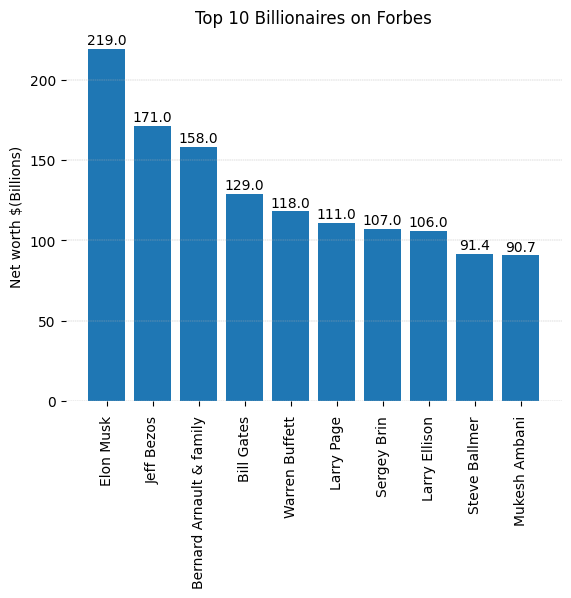

In [32]:
fig, ax = plt.subplots()
ax.bar(forbes_df['Name'][:10], forbes_df['Networth($ in Billion)'][:10])

for i, v in enumerate(forbes_df['Networth($ in Billion)'][:10]):
    ax.text(i, v + 1, str(v), ha='center', va='bottom')

[s.set_visible(False) for s in ax.spines.values()]
ax.set_title('Top 10 Billionaires on Forbes')
ax.set_ylabel('Net worth $(Billions)')
ax.set_xticklabels(labels=forbes_df['Name'][:11], rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.3)
plt.show()

In [33]:
forbes_df['Country'].unique()

array(['United States', 'France', 'India', 'Mexico', 'China', 'Canada',
       'Spain', 'Germany', 'Hong Kong', 'Italy', 'Australia', 'Austria',
       'Japan', 'Indonesia', 'Switzerland', 'Chile', 'Russia',
       'Singapore', 'Sweden', 'Czechia', 'United Kingdom', 'Brazil',
       'Israel', 'Netherlands', 'Ireland', 'Nigeria', 'Denmark',
       'Thailand', 'Cyprus', 'Malaysia', 'Taiwan', 'Monaco', 'Colombia',
       'New Zealand', 'South Korea', 'Belgium', 'South Africa',
       'Philippines', 'Egypt', 'Greece', 'Norway', 'Vietnam', 'Poland',
       'Eswatini (Swaziland)', 'Peru', 'Algeria', 'Kazakhstan', 'Georgia',
       'Portugal', 'Turkey', 'Finland', 'Ukraine', 'Argentina', 'Belize',
       'Venezuela', 'Lebanon', 'Zimbabwe', 'Romania',
       'United Arab Emirates', 'Oman', 'Iceland', 'Guernsey',
       'Liechtenstein', 'Qatar', 'Morocco', 'Bulgaria', 'Macau',
       'Slovakia', 'Barbados', 'Uruguay', 'Nepal', 'Tanzania',
       'St. Kitts and Nevis', 'Hungary', 'Estonia'], dty

In [36]:
len(forbes_df['Country'].unique())

75

In [37]:
forbes_df.groupby('Country').size()

Country
Algeria            1
Argentina          6
Australia         44
Austria           11
Barbados           1
                ... 
United States    719
Uruguay            2
Venezuela          1
Vietnam            7
Zimbabwe           1
Length: 75, dtype: int64

In [38]:
country_counts=forbes_df.groupby('Country').size()

In [39]:
country_counts=country_counts.to_frame()

In [41]:
country_counts=country_counts.rename(columns={0:'Count'})

In [42]:
country_counts=country_counts.sort_values(by='Count',ascending=False)

In [43]:
country_counts

,Count
Country,
United States,719
China,515
India,161
Germany,130
Russia,81
...,...
Eswatini (Swaziland),1
Estonia,1
Belize,1


<ipython-input-46-dc2e504fe1f7>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=country_counts.index, rotation=90)


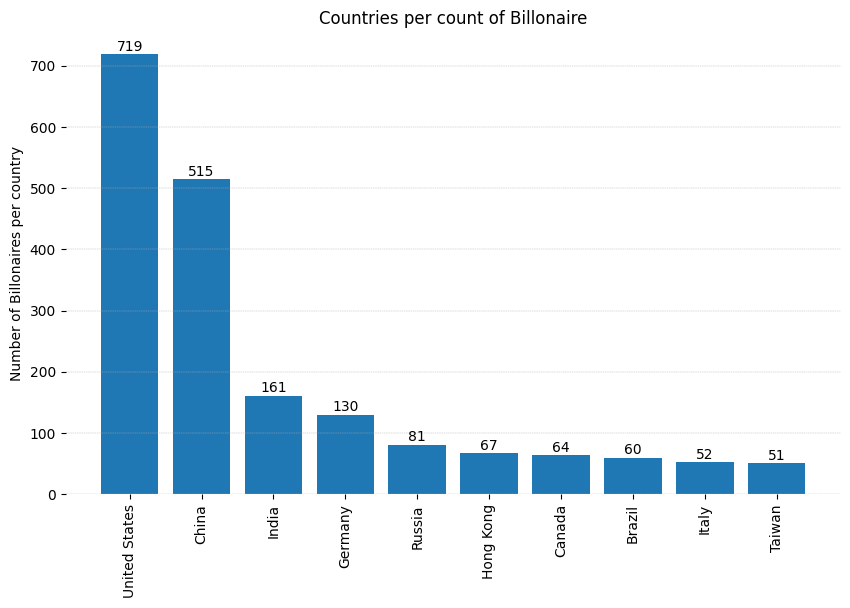

In [46]:
fig,ax2=plt.subplots(figsize=(10,6))
ax2.bar(country_counts.index[:10],country_counts['Count'][:10])

for i, v in enumerate(country_counts['Count'][:10]):
    ax2.text(i, v + 1, str(v), ha='center', va='bottom')

[s.set_visible(False) for s in ax2.spines.values()]
ax2.set_title('Countries per count of Billonaire')
ax2.set_ylabel('Number of Billonaires per country')
ax2.set_xticklabels(labels=country_counts.index, rotation=90)
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()


In [48]:
country_counts.loc[['Turkey']]

,Count
Country,
Turkey,24


In [49]:
forbes_df['Country'][forbes_df['Country']=='Turkey'].index.tolist()

[619,
 1320,
 1334,
 1365,
 1430,
 1580,
 1619,
 1660,
 1820,
 1929,
 1943,
 1963,
 1964,
 1966,
 2002,
 2127,
 2194,
 2277,
 2375,
 2455,
 2458,
 2548,
 2552,
 2591]

In [50]:
turkish_billionaires=forbes_df.iloc[[619,
 1320,
 1334,
 1365,
 1430,
 1580,
 1619,
 1660,
 1820,
 1929,
 1943,
 1963,
 1964,
 1966,
 2002,
 2127,
 2194,
 2277,
 2375,
 2455,
 2458,
 2548,
 2552,
 2591]]

In [52]:
turkish_billionaires

,Rank,Name,Networth($ in Billion),Age,Country,Source,Industry
619,601,Murat Ulker,4.7,63,Turkey,food,Food & Beverage
1320,1292,Ferit Faik Sahenk,2.4,58,Turkey,diversified,Diversified
1334,1292,Hamdi Ulukaya,2.4,49,Turkey,greek yogurt,Food & Beverage
1365,1341,Erman Ilicak,2.3,54,Turkey,construction,Construction & Engineering
1430,1397,Filiz Sahenk,2.2,55,Turkey,diversified,Diversified
1580,1579,Sezai Bacaksiz,1.9,72,Turkey,diversified,Diversified
1619,1579,Nihat Ozdemir,1.9,72,Turkey,diversified,Diversified
1660,1645,Ibrahim Erdemoglu,1.8,59,Turkey,carpet,Manufacturing
1820,1818,Semahat Sevim Arsel,1.6,93,Turkey,diversified,Diversified
1929,1929,Hamdi Akin & family,1.5,67,Turkey,diversified,Diversified


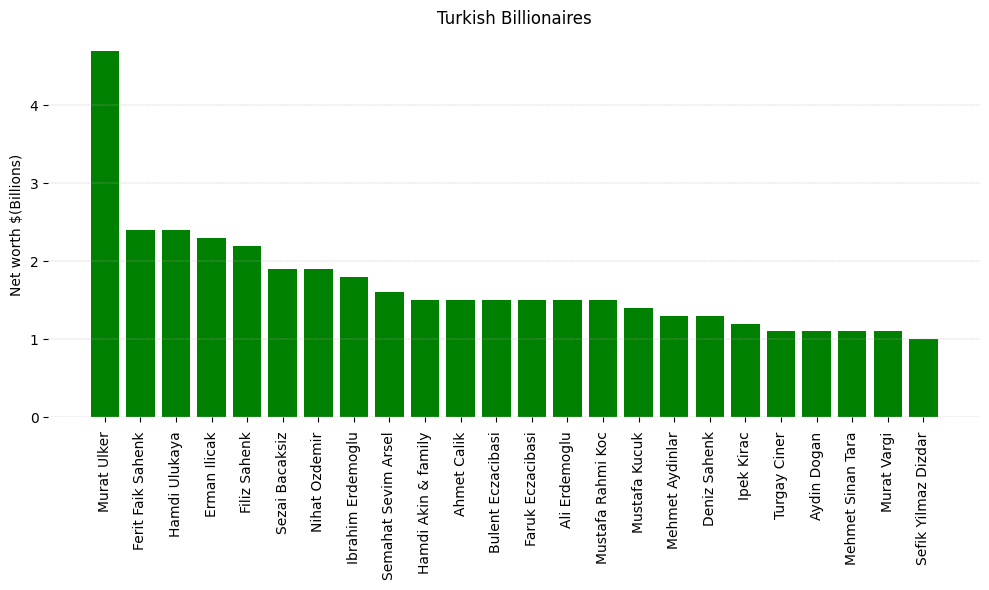

In [81]:
fig, ax3 = plt.subplots(figsize=(10, 6))

ax3.bar(turkish_billionaires['Name'], turkish_billionaires['Networth($ in Billion)'], color='green')

[s.set_visible(False) for s in ax3.spines.values()]

ax3.set_title('Turkish Billionaires')
ax3.set_ylabel('Net worth $(Billions)')

plt.xticks(rotation=90)

plt.grid(axis='y', linestyle='--', linewidth=0.3)
plt.tight_layout()
plt.show()


In [69]:
forbes_df['Industry'].unique()

array(['Automotive ', 'Technology ', 'Fashion & Retail ',
       'Finance & Investments ', 'Diversified ', 'Media & Entertainment ',
       'Telecom ', 'Food & Beverage ', 'Logistics ', 'Real Estate ',
       'Metals & Mining ', 'Manufacturing ', 'Gambling & Casinos ',
       'Healthcare ', 'Service ', 'Energy ',
       'Construction & Engineering ', 'Sports '], dtype=object)

In [70]:
forbes_df['Industry']=forbes_df['Industry'].apply(lambda x:x.replace(' ',''))

In [71]:
industry_count=forbes_df.groupby('Industry').size()

In [72]:
industry_count=industry_count.to_frame()
industry_count=industry_count.rename(columns={0:'Count'})
industry_count=industry_count.sort_values(by='Count',ascending=False)

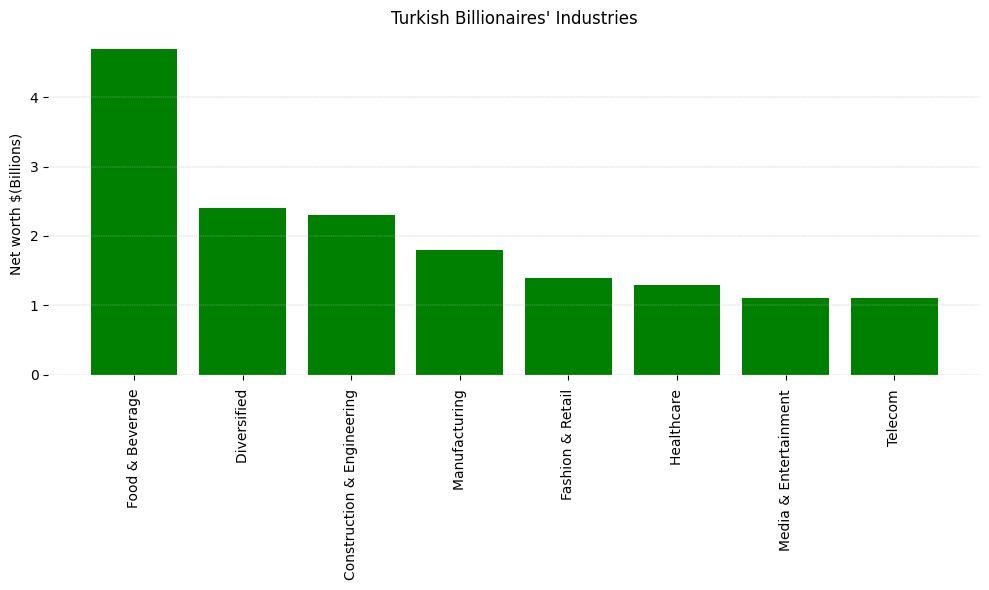

In [96]:
fig, ax3 = plt.subplots(figsize=(10, 6))

ax3.bar(turkish_billionaires['Industry'], turkish_billionaires['Networth($ in Billion)'], color='green')

[s.set_visible(False) for s in ax3.spines.values()]

ax3.set_title("Turkish Billionaires' Industries")
ax3.set_ylabel('Net worth $(Billions)')

# Rotate x-axis labels vertically for readability
plt.xticks(rotation=90)

plt.grid(axis='y', linestyle='--', linewidth=0.3)
plt.tight_layout()
plt.show()


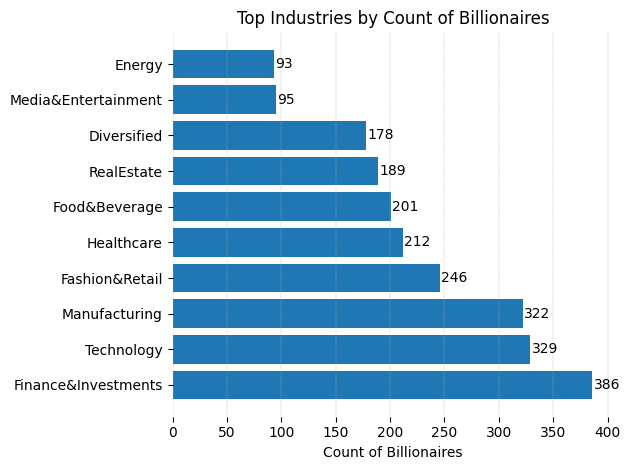

In [82]:
fig, ax4 = plt.subplots()

for i, v in enumerate(industry_count['Count'][:10]):
    ax4.text(v + 1, i, str(v), ha='left', va='center')

[s.set_visible(False) for s in ax4.spines.values()]
ax4.barh(industry_count.index[:10], industry_count['Count'][:10])
ax4.set_title('Top Industries by Count of Billionaires')
ax4.set_xlabel('Count of Billionaires')

plt.grid(axis='x', linestyle='--', linewidth=0.3)
plt.tight_layout()
plt.show()


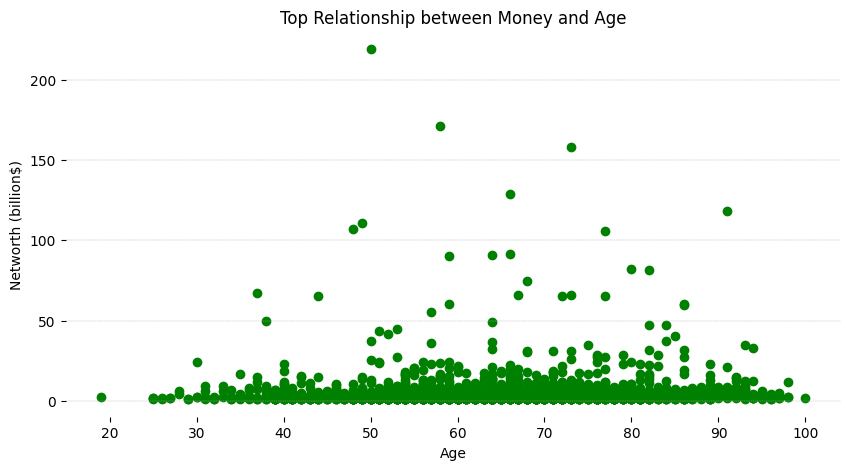

In [84]:
fig,ax5=plt.subplots(figsize=(10,5))
ax5.scatter(forbes_df['Age'],forbes_df['Networth($ in Billion)'],color='green')
[s.set_visible(False) for s in ax5.spines.values()]
ax5.set_title('Top Relationship between Money and Age')
ax5.set_xlabel('Age')
ax5.set_ylabel('Networth (billion$)')
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

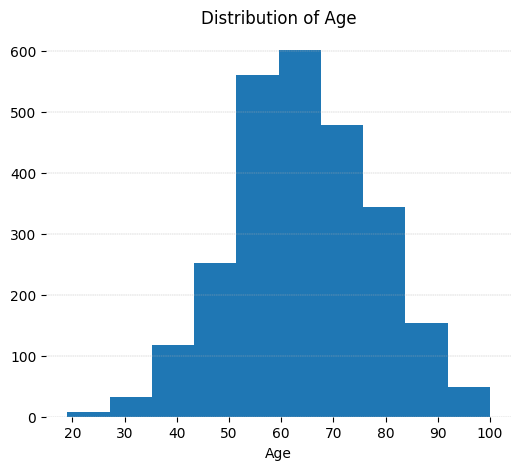

In [87]:
fig, ax6 = plt.subplots(figsize=(6,5))
ax6.hist(forbes_df['Age'])
[s.set_visible(False) for s in ax6.spines.values()]
ax6.set_title('Distribution of Age')
ax6.set_xlabel('Age')
plt.grid(axis='y',linestyle='--',linewidth=0.3)
plt.show()

In [90]:
by_age=forbes_df.sort_values(by='Age',ascending=True)

In [91]:
by_age

,Rank,Name,Networth($ in Billion),Age,Country,Source,Industry
1311,1292,Kevin David Lehmann,2.4,19,Germany,drugstores,Fashion&Retail
2062,1929,Wang Zelong,1.5,25,China,chemicals,Metals&Mining
1975,1929,Pedro Franceschi,1.5,25,Brazil,fintech,Finance&Investments
2190,2190,Alexandra Andresen,1.3,25,Norway,investments,Diversified
1961,1929,Henrique Dubugras,1.5,26,Brazil,fintech,Finance&Investments
...,...,...,...,...,...,...,...
1939,1929,Ana Maria Brescia Cafferata,1.5,97,Peru,"mining, banking",Diversified
1273,1238,Charles Munger,2.5,98,United States,Berkshire Hathaway,Finance&Investments
1377,1341,David Murdock,2.3,98,United States,"Dole, real estate",Food&Beverage
162,163,Robert Kuok,11.7,98,Malaysia,"palm oil, shipping, property",Diversified
